<a href="https://colab.research.google.com/github/britu-s/transfer-learning-gatos-cachorros/blob/main/Desafio1_ML_Gatos_Cachorros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto de Tranfer Learning  em Python**`

O projeto consiste em aplicar o método de Transfer Learning em uma rede de Deep Learning na linguagem Python no ambiente COLAB. (DIO)

# **Importar biliotecas (dependencias)**




In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import zipfile
import os


# **Baixar data set gatos e cachorros**

  Usamos outro data set mais leve 70 megas, ja vem pronto separado ppor pastas mais organizado para quem esta aprendendo.

In [20]:
# URL do dataset
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

# Baixar o zip (sem extrair ainda)
zip_path = tf.keras.utils.get_file('cats_and_dogs_filtered.zip', origin=_URL, extract=False)

# Caminho onde o zip será descompactado
extract_dir = os.path.join(os.path.dirname(zip_path), 'cats_and_dogs_filtered')

# Descompactar manualmente
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(os.path.dirname(zip_path))

# Verificar se a extração deu certo
print("✅ Dataset extraído em:", extract_dir)
print("📂 Existe train?", os.path.exists(os.path.join(extract_dir, 'train')))
print("📂 Existe validation?", os.path.exists(os.path.join(extract_dir, 'validation')))


✅ Dataset extraído em: /root/.keras/datasets/cats_and_dogs_filtered
📂 Existe train? True
📂 Existe validation? True


# **Preparar as pastas com as imagens**

In [21]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

train_cat_dir = os.path.join(train_dir, 'cats')
train_dog_dir = os.path.join(train_dir, 'dogs')

validation_cat_dir = os.path.join(validation_dir, 'cats')
validation_dog_dir = os.path.join(validation_dir, 'dogs')


# **Preparando os dados com ImageDatagenerator**

In [22]:
# ETAPA 5 - PREPARAR OS DADOS COM ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(160, 160),
    batch_size=20,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(160, 160),
    batch_size=20,
    class_mode='binary'
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# **Criar o modelo com Transfer Learning com MobileNetV2**

In [23]:
# Carregar o modelo pré-treinado MobileNetV2 sem a parte final (sem o top)
IMG_SHAPE = (160, 160, 3)

base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,include_top=False,weights='imagenet')

# Congelar os pesos da MobileNet para não treinar de novo
base_model.trainable = False

# Criar o modelo completo com uma camada densa final
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1, activation='sigmoid')  # binário: gato ou cachorro
])


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# **Compilar  e treinar o modelo**

In [27]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit(
    train_generator,
    epochs=3,
    validation_data=validation_generator
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/3
100/100 ━━━━━━━━━━━━━━━━━━━━ 71s 652ms/step - accuracy: 0.9285 - loss: 0.2348 - val_accuracy: 0.9600 - val_loss: 0.1053
Epoch 2/3
100/100 ━━━━━━━━━━━━━━━━━━━━ 61s 607ms/step - accuracy: 0.9700 - loss: 0.0807 - val_accuracy: 0.9610 - val_loss: 0.0922
Epoch 3/3
100/100 ━━━━━━━━━━━━━━━━━━━━ 61s 607ms/step - accuracy: 0.9783 - loss: 0.0564 - val_accuracy: 0.9640 - val_loss: 0.0858


# **Resultado com grafico de desempenho**

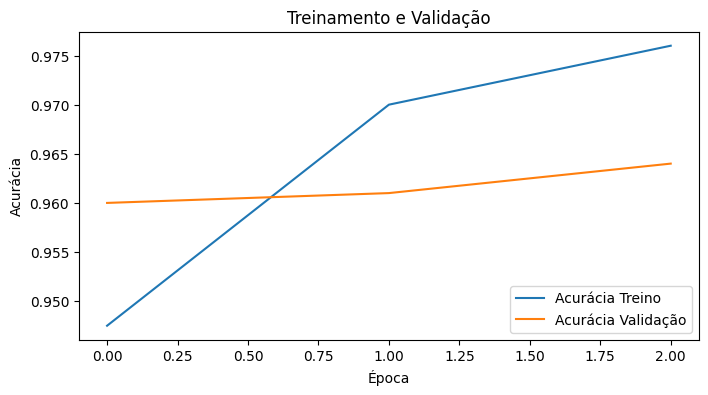

In [29]:
# Extrair histórico de treino e validação
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

# Plotar gráfico
plt.figure(figsize=(8, 4))
plt.plot(epochs_range, acc, label='Acurácia Treino')
plt.plot(epochs_range, val_acc, label='Acurácia Validação')
plt.legend(loc='lower right')
plt.title('Treinamento e Validação')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.show()
